<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from tensorflow.keras.applications import VGG16

import matplotlib.pyplot as plt
%matplotlib inline

keras:  2.2.4-tf


## Step 1: Data Loading

In [2]:
base_dir = 'C:/Users/tyd/OneDrive - Ngee Ann Polytechnic/Y3 SEM1/DL/assignment1/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#Set image size to 150*150 
img_size = 150


## Step 2:  Develop the Image Classification Models

### Model #1

Start off with a baseline model so that I can slowly scale it up later on.

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5607456   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 5,608,682
Trainable params: 5,608,682
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [5]:
# Train the Model

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batchSize = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/20
235/234 [==============================] - 34s 144ms/step - loss: 2.3092 - acc: 0.1765 - val_loss: 2.2542 - val_acc: 0.1930
Epoch 2/20
235/234 [==============================] - 32s 135ms/step - loss: 2.1735 - acc: 0.2096 - val_loss: 2.1817 - val_acc: 0.2245
Epoch 3/20
235/234 [==============================] - 35s 149ms/step - loss: 2.1053 - acc: 0.2377 - val_loss: 2.1515 - val_acc: 0.2300
Epoch 4/20
235/234 [==============================] - 32s 137ms/step - loss: 2.0447 - acc: 0.2880 - val_loss: 2.1182 - val_acc: 0.2610
Epoch 5/20
235/234 [==============================] - 33s 139ms/step - loss: 2.0006 - acc: 0.3003 - val_loss: 2.0914 - val_acc: 0.2605
Epoch 6/20
235/234 [==============================] - 34s 144ms/step - loss: 1.9587 - acc: 0.3191 - val_loss: 2.0778 - val_acc: 0.2710
Epoch 7/20
235/234 [==============================] - 3

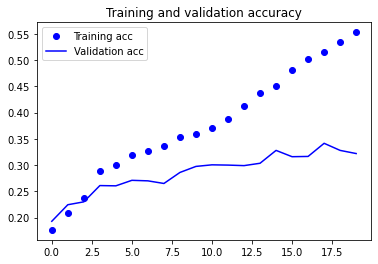

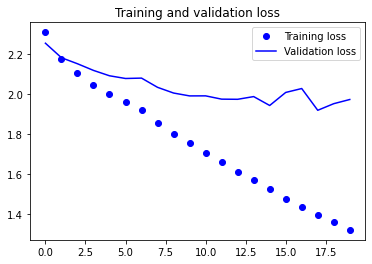

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [9]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batchSize = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/20
235/234 [==============================] - 36s 152ms/step - loss: 2.1402 - acc: 0.2348 - val_loss: 2.0203 - val_acc: 0.2950
Epoch 2/20
235/234 [==============================] - 34s 146ms/step - loss: 1.9019 - acc: 0.3437 - val_loss: 1.8765 - val_acc: 0.3615
Epoch 3/20
235/234 [==============================] - 34s 145ms/step - loss: 1.7774 - acc: 0.3859 - val_loss: 1.8870 - val_acc: 0.3505
Epoch 4/20
235/234 [==============================] - 34s 146ms/step - loss: 1.6840 - acc: 0.4287 - val_loss: 1.8389 - val_acc: 0.3660
Epoch 5/20
235/234 [==============================] - 35s 150ms/step - loss: 1.5946 - acc: 0.4631 - val_loss: 1.7611 - val_acc: 0.3890
Epoch 6/20
235/234 [==============================] - 34s 144ms/step - loss: 1.5099 - acc: 0.4867 - val_loss: 1.6666 - val_acc: 0.4430
Epoch 7/20
235/234 [==============================] - 3

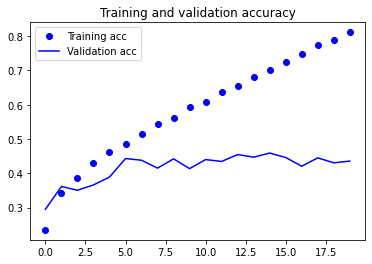

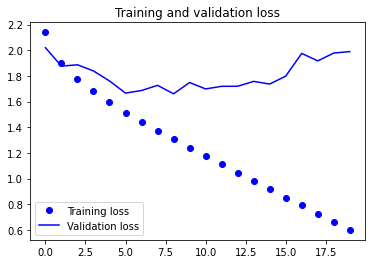

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [4]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    brightness_range=[0.3,1.0],
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

batchSize = 32


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/20
235/234 [==============================] - 74s 316ms/step - loss: 2.2494 - acc: 0.1727 - val_loss: 2.1117 - val_acc: 0.2555
Epoch 2/20
235/234 [==============================] - 63s 270ms/step - loss: 2.1063 - acc: 0.2560 - val_loss: 1.9948 - val_acc: 0.3070
Epoch 3/20
235/234 [==============================] - 64s 273ms/step - loss: 2.0347 - acc: 0.2900 - val_loss: 1.9415 - val_acc: 0.3350
Epoch 4/20
235/234 [==============================] - 64s 272ms/step - loss: 1.9726 - acc: 0.3217 - val_loss: 2.0779 - val_acc: 0.3380
Epoch 5/20
235/234 [==============================] - 64s 273ms/step - loss: 1.9422 - acc: 0.3371 - val_loss: 1.8760 - val_acc: 0.3830
Epoch 6/20
235/234 [==============================] - 64s 271ms/step - loss: 1.9006 - acc: 0.3455 - val_loss: 1.8653 - val_acc: 0.3750
Epoch 7/20
235/234 [==============================] - 6

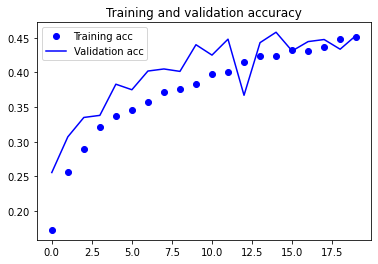

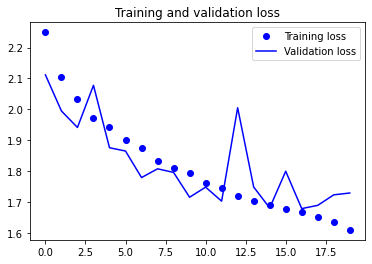

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    brightness_range=[0.3,1.0],
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

batchSize = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/40
235/234 [==============================] - 80s 339ms/step - loss: 2.1852 - acc: 0.2160 - val_loss: 2.0377 - val_acc: 0.2805
Epoch 2/40
235/234 [==============================] - 66s 282ms/step - loss: 2.0319 - acc: 0.2943 - val_loss: 1.8869 - val_acc: 0.3605
Epoch 3/40
235/234 [==============================] - 67s 284ms/step - loss: 1.9660 - acc: 0.3215 - val_loss: 1.9377 - val_acc: 0.3575
Epoch 4/40
235/234 [==============================] - 68s 288ms/step - loss: 1.9054 - acc: 0.3445 - val_loss: 2.0092 - val_acc: 0.3535
Epoch 5/40
235/234 [==============================] - 67s 284ms/step - loss: 1.8380 - acc: 0.3679 - val_loss: 1.8152 - val_acc: 0.4025
Epoch 6/40
235/234 [==============================] - 65s 276ms/step - loss: 1.8053 - acc: 0.3828 - val_loss: 1.7467 - val_acc: 0.4195
Epoch 7/40
235/234 [==============================] - 6

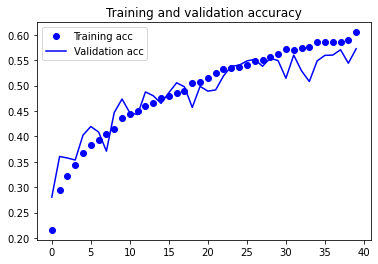

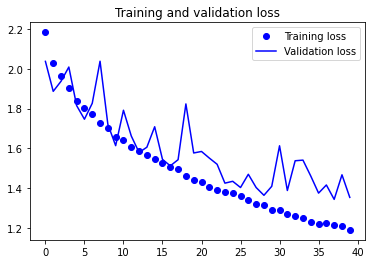

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 512)      

In [16]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    brightness_range=[0.3,1.0],
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

batchSize = 32


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=70,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/70
235/234 [==============================] - 75s 320ms/step - loss: 2.1413 - acc: 0.2313 - val_loss: 2.2437 - val_acc: 0.3040
Epoch 2/70
235/234 [==============================] - 74s 315ms/step - loss: 1.9671 - acc: 0.3219 - val_loss: 2.0783 - val_acc: 0.3285
Epoch 3/70
235/234 [==============================] - 74s 316ms/step - loss: 1.8551 - acc: 0.3587 - val_loss: 2.0293 - val_acc: 0.3515
Epoch 4/70
235/234 [==============================] - 75s 319ms/step - loss: 1.7746 - acc: 0.3904 - val_loss: 1.7013 - val_acc: 0.4145
Epoch 5/70
235/234 [==============================] - 74s 316ms/step - loss: 1.6995 - acc: 0.4205 - val_loss: 1.8000 - val_acc: 0.4255
Epoch 6/70
235/234 [==============================] - 74s 315ms/step - loss: 1.6433 - acc: 0.4359 - val_loss: 1.7102 - val_acc: 0.4440
Epoch 7/70
235/234 [==============================] - 7

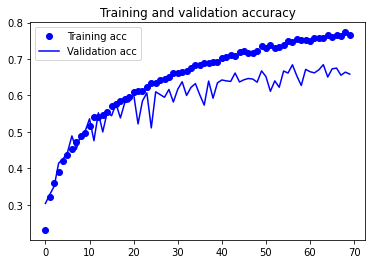

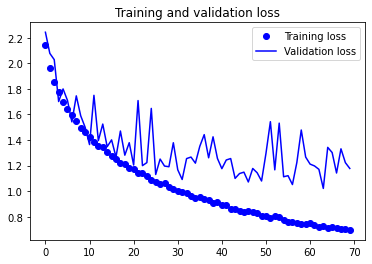

In [18]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 512)      

In [20]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    brightness_range=[0.3,1.0],
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
    
batchSize = 32


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=70,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/70
235/234 [==============================] - 76s 323ms/step - loss: 2.9531 - acc: 0.1996 - val_loss: 2.3891 - val_acc: 0.2975
Epoch 2/70
235/234 [==============================] - 74s 316ms/step - loss: 2.3548 - acc: 0.2992 - val_loss: 2.1868 - val_acc: 0.3470
Epoch 3/70
235/234 [==============================] - 75s 321ms/step - loss: 2.1762 - acc: 0.3417 - val_loss: 2.0241 - val_acc: 0.3970
Epoch 4/70
235/234 [==============================] - 74s 317ms/step - loss: 2.0554 - acc: 0.3541 - val_loss: 1.9849 - val_acc: 0.3990
Epoch 5/70
235/234 [==============================] - 75s 320ms/step - loss: 1.9835 - acc: 0.3731 - val_loss: 1.8973 - val_acc: 0.4205
Epoch 6/70
235/234 [==============================] - 77s 326ms/step - loss: 1.9307 - acc: 0.3901 - val_loss: 1.9287 - val_acc: 0.4110
Epoch 7/70
235/234 [==============================] - 7

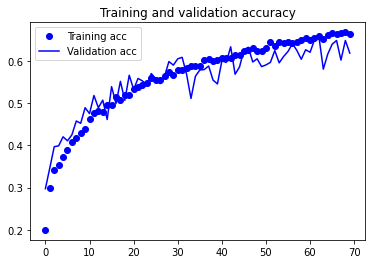

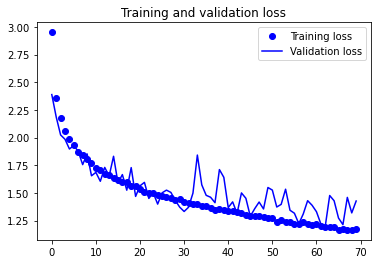

In [22]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,   2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [4]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy since there are 10 different foods.
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    brightness_range=[0.3,1.0],
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
    
batchSize = 32


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchSize,
        class_mode='categorical') #categorical

# Train the Model
stepsperepoch = 7500/batchSize
validationsteps = 2000/batchSize

history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/100
235/234 [==============================] - 78s 330ms/step - loss: 2.2000 - acc: 0.2120 - val_loss: 1.9929 - val_acc: 0.3250
Epoch 2/100
235/234 [==============================] - 74s 316ms/step - loss: 2.0250 - acc: 0.3003 - val_loss: 1.9922 - val_acc: 0.3315
Epoch 3/100
235/234 [==============================] - 74s 315ms/step - loss: 1.9255 - acc: 0.3387 - val_loss: 1.9094 - val_acc: 0.3695
Epoch 4/100
235/234 [==============================] - 74s 315ms/step - loss: 1.8348 - acc: 0.3704 - val_loss: 1.7574 - val_acc: 0.4080
Epoch 5/100
235/234 [==============================] - 76s 325ms/step - loss: 1.7854 - acc: 0.3951 - val_loss: 1.6747 - val_acc: 0.4515
Epoch 6/100
235/234 [==============================] - 76s 323ms/step - loss: 1.7295 - acc: 0.4121 - val_loss: 1.6422 - val_acc: 0.4510
Epoch 7/100
235/234 [============================

Epoch 60/100
235/234 [==============================] - 74s 315ms/step - loss: 1.0127 - acc: 0.6848 - val_loss: 1.2232 - val_acc: 0.6435
Epoch 61/100
235/234 [==============================] - 76s 322ms/step - loss: 0.9895 - acc: 0.6873 - val_loss: 1.2281 - val_acc: 0.6500
Epoch 62/100
235/234 [==============================] - 75s 320ms/step - loss: 1.0026 - acc: 0.6859 - val_loss: 1.2516 - val_acc: 0.6325
Epoch 63/100
235/234 [==============================] - 75s 318ms/step - loss: 0.9868 - acc: 0.6852 - val_loss: 1.1219 - val_acc: 0.6610
Epoch 64/100
235/234 [==============================] - 75s 320ms/step - loss: 0.9846 - acc: 0.6919 - val_loss: 1.1320 - val_acc: 0.6505
Epoch 65/100
235/234 [==============================] - 75s 317ms/step - loss: 0.9785 - acc: 0.6917 - val_loss: 1.0752 - val_acc: 0.6670
Epoch 66/100
235/234 [==============================] - 74s 317ms/step - loss: 0.9719 - acc: 0.6905 - val_loss: 1.2896 - val_acc: 0.6100
Epoch 67/100
235/234 [===================

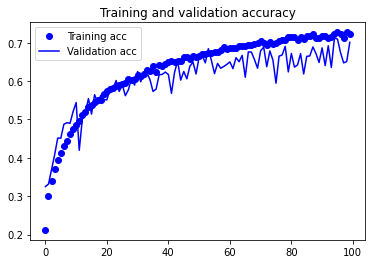

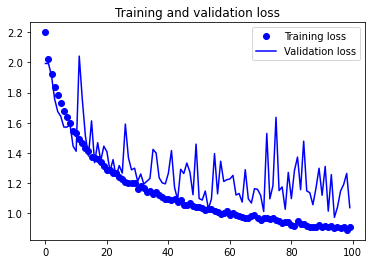

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
# Save the Model
#model.save('food_model_1.h5')

### Model #2

VGG16 (chosen for Model 2)

In [4]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,10))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

train_features = np.reshape(train_features, (7500, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(4 * 4 * 512,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 4,199,946
Trainable params: 4,199,946
Non-trainable params: 0
_________________________________________________________________
Train on 7500 samples, validate on 2000 samples
Epoch 1/30
7500/7500 [==============================] - 2s 297us/sample - loss: 1.3604 - acc: 0.5357 - val_loss: 1.4149 - val_acc: 0.5095
Epoch 2/30
7500/7500 [==============================] - 1s 135us/sample - loss: 0.8920 - acc: 0.7075 - val_loss: 1.1389 - val_acc: 0.6240
Epoch 3/30
7500/7500 [==============================] - 1s 140us/sample - loss: 0.6995 - acc: 0.7720 - val_loss: 1.0938 - val_acc: 0.6415
Epoch 4/30
7500/7500 [========================

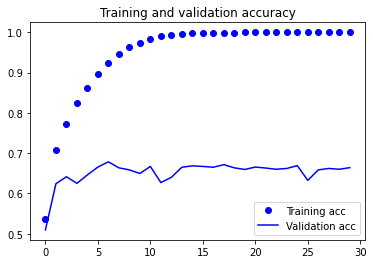

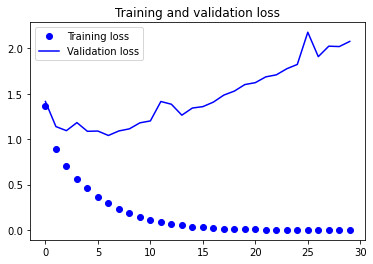

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 18,914,634
Trainable params: 4,199,946
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      brightness_range=[0.3,1.0],
      horizontal_flip=True
       )
#Val Data
test_datagen = ImageDataGenerator(rescale=1./255)

#set batch_size
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,#batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,#batch_size,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=7500/batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2000/batch_size,
        )

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/30
235/234 [==============================] - 78s 333ms/step - loss: 1.7477 - acc: 0.3891 - val_loss: 1.3276 - val_acc: 0.5530
Epoch 2/30
235/234 [==============================] - 80s 342ms/step - loss: 1.4602 - acc: 0.4972 - val_loss: 1.1851 - val_acc: 0.6115
Epoch 3/30
235/234 [==============================] - 78s 331ms/step - loss: 1.3678 - acc: 0.5276 - val_loss: 1.1007 - val_acc: 0.6360
Epoch 4/30
235/234 [==============================] - 79s 335ms/step - loss: 1.3107 - acc: 0.5619 - val_loss: 1.1918 - val_acc: 0.5945
Epoch 5/30
235/234 [==============================] - 78s 332ms/step - loss: 1.2683 - acc: 0.5727 - val_loss: 1.0591 - val_acc: 0.6530
Epoch 6/30
235/234 [==============================] - 78s 334ms/step - loss: 1.2384 - acc: 0.5795 - val_loss: 1.0815 - val_acc: 0.6535
Epoch 7/30
235/234 [==============================] - 7

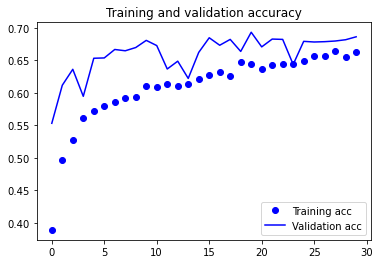

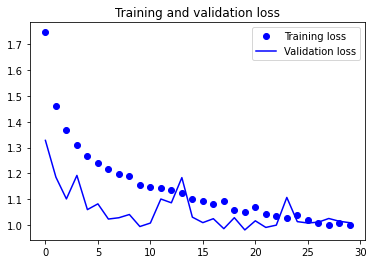

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 18,914,634
Trainable params: 4,199,946
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      brightness_range=[0.3,1.0],
      horizontal_flip=True,
       )
#Val Data
test_datagen = ImageDataGenerator(rescale=1./255)

#set batch_size
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,#batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,#batch_size,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=7500/batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2000/batch_size,
        )

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Train for 234.375 steps, validate for 62.5 steps
Epoch 1/100
235/234 [==============================] - 81s 344ms/step - loss: 2.1304 - acc: 0.3460 - val_loss: 1.3118 - val_acc: 0.5565
Epoch 2/100
235/234 [==============================] - 78s 333ms/step - loss: 1.5140 - acc: 0.4797 - val_loss: 1.1957 - val_acc: 0.6030
Epoch 3/100
235/234 [==============================] - 81s 343ms/step - loss: 1.4005 - acc: 0.5192 - val_loss: 1.1881 - val_acc: 0.6040
Epoch 4/100
235/234 [==============================] - 80s 343ms/step - loss: 1.3365 - acc: 0.5373 - val_loss: 1.0968 - val_acc: 0.6310
Epoch 5/100
235/234 [==============================] - 81s 344ms/step - loss: 1.2811 - acc: 0.5589 - val_loss: 1.1024 - val_acc: 0.6390
Epoch 6/100
235/234 [==============================] - 80s 340ms/step - loss: 1.2640 - acc: 0.5703 - val_loss: 1.1220 - val_acc: 0.6510
Epoch 7/100
235/234 [============================

Epoch 60/100
235/234 [==============================] - 87s 372ms/step - loss: 0.9801 - acc: 0.6739 - val_loss: 1.3941 - val_acc: 0.6755
Epoch 61/100
235/234 [==============================] - 88s 372ms/step - loss: 0.9971 - acc: 0.6741 - val_loss: 1.5995 - val_acc: 0.6350
Epoch 62/100
235/234 [==============================] - 92s 392ms/step - loss: 0.9930 - acc: 0.6697 - val_loss: 1.4903 - val_acc: 0.6520
Epoch 63/100
235/234 [==============================] - 94s 399ms/step - loss: 0.9926 - acc: 0.6721 - val_loss: 1.3605 - val_acc: 0.6630
Epoch 64/100
235/234 [==============================] - 94s 398ms/step - loss: 0.9895 - acc: 0.6732 - val_loss: 1.4207 - val_acc: 0.6630
Epoch 65/100
235/234 [==============================] - 92s 391ms/step - loss: 0.9776 - acc: 0.6796 - val_loss: 1.5160 - val_acc: 0.6630
Epoch 66/100
235/234 [==============================] - 88s 375ms/step - loss: 0.9734 - acc: 0.6760 - val_loss: 1.4733 - val_acc: 0.6705
Epoch 67/100
235/234 [===================

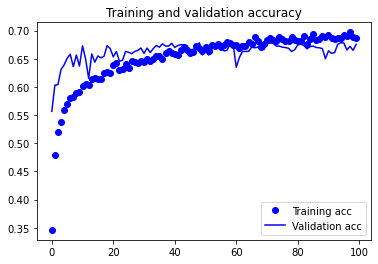

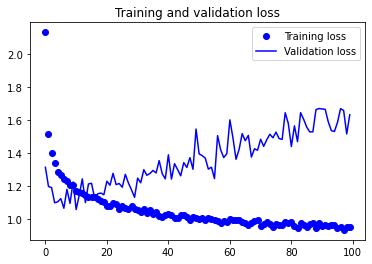

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])        
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 18,914,634
Trainable params: 11,279,370
Non-trainable params: 7,635,264
_________________________________________________________________


In [45]:
history = model.fit(
      train_generator,
      steps_per_epoch=7500/batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2000/batch_size,
        )

Train for 234.375 steps, validate for 62.5 steps
Epoch 1/100
235/234 [==============================] - 90s 383ms/step - loss: 0.9077 - acc: 0.6929 - val_loss: 1.3778 - val_acc: 0.6830
Epoch 2/100
235/234 [==============================] - 87s 369ms/step - loss: 0.8728 - acc: 0.7107 - val_loss: 1.5263 - val_acc: 0.6950
Epoch 3/100
235/234 [==============================] - 88s 375ms/step - loss: 0.8237 - acc: 0.7241 - val_loss: 1.5067 - val_acc: 0.6900
Epoch 4/100
235/234 [==============================] - 87s 372ms/step - loss: 0.8199 - acc: 0.7283 - val_loss: 1.7147 - val_acc: 0.7030
Epoch 5/100
235/234 [==============================] - 89s 380ms/step - loss: 0.7928 - acc: 0.7381 - val_loss: 1.5267 - val_acc: 0.7000
Epoch 6/100
235/234 [==============================] - 89s 380ms/step - loss: 0.7493 - acc: 0.7503 - val_loss: 1.5566 - val_acc: 0.7080
Epoch 7/100
235/234 [==============================] - 87s 372ms/step - loss: 0.7632 - acc: 0.7500 - val_loss: 1.6961 - val_acc: 0.7125

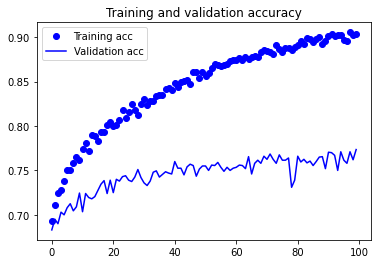

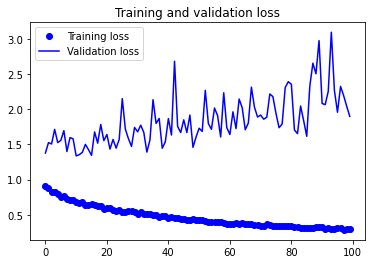

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 4,199,946
Non-trainable params: 14,714,688
__________________________________

In [8]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])        
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 11,279,370
Non-trainable params: 7,635,264
__________________________________

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=7500/batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2000/batch_size,
        )

Train for 234.375 steps, validate for 62.5 steps
Epoch 1/100
235/234 [==============================] - 93s 397ms/step - loss: 2.5614 - acc: 0.1269 - val_loss: 2.0307 - val_acc: 0.3225
Epoch 2/100
235/234 [==============================] - 79s 335ms/step - loss: 2.1443 - acc: 0.2161 - val_loss: 1.7624 - val_acc: 0.3905
Epoch 3/100
235/234 [==============================] - 79s 336ms/step - loss: 1.9410 - acc: 0.2961 - val_loss: 1.5634 - val_acc: 0.4875
Epoch 4/100
235/234 [==============================] - 81s 343ms/step - loss: 1.7786 - acc: 0.3709 - val_loss: 1.4284 - val_acc: 0.5375
Epoch 5/100
235/234 [==============================] - 79s 338ms/step - loss: 1.6184 - acc: 0.4317 - val_loss: 1.2788 - val_acc: 0.5905
Epoch 6/100
235/234 [==============================] - 80s 340ms/step - loss: 1.5208 - acc: 0.4639 - val_loss: 1.2022 - val_acc: 0.6030
Epoch 7/100
235/234 [==============================] - 80s 338ms/step - loss: 1.4413 - acc: 0.5016 - val_loss: 1.1399 - val_acc: 0.6235

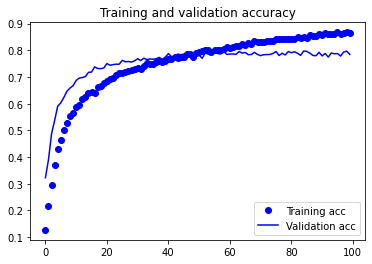

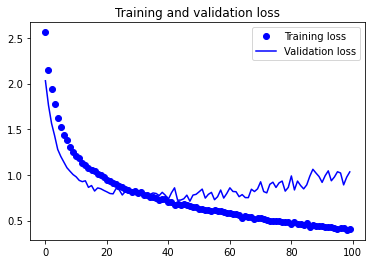

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(1e-3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 4,199,946
Non-trainable params: 14,714,688
____________________________________

In [6]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])        
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 11,279,370
Non-trainable params: 7,635,264
____________________________________

In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=7500/batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2000/batch_size,
        )

Train for 234.375 steps, validate for 62.5 steps
Epoch 1/100
235/234 [==============================] - 94s 398ms/step - loss: 3.4958 - acc: 0.1333 - val_loss: 2.8843 - val_acc: 0.3430
Epoch 2/100
235/234 [==============================] - 82s 350ms/step - loss: 2.9746 - acc: 0.2349 - val_loss: 2.5037 - val_acc: 0.4445
Epoch 3/100
235/234 [==============================] - 80s 341ms/step - loss: 2.6395 - acc: 0.3281 - val_loss: 2.2198 - val_acc: 0.5135
Epoch 4/100
235/234 [==============================] - 80s 340ms/step - loss: 2.4186 - acc: 0.3931 - val_loss: 2.0122 - val_acc: 0.5475
Epoch 5/100
235/234 [==============================] - 80s 340ms/step - loss: 2.2454 - acc: 0.4359 - val_loss: 1.8942 - val_acc: 0.5715
Epoch 6/100
235/234 [==============================] - 80s 340ms/step - loss: 2.0975 - acc: 0.4776 - val_loss: 1.7796 - val_acc: 0.6075
Epoch 7/100
235/234 [==============================] - 81s 343ms/step - loss: 1.9739 - acc: 0.5115 - val_loss: 1.6643 - val_acc: 0.6385

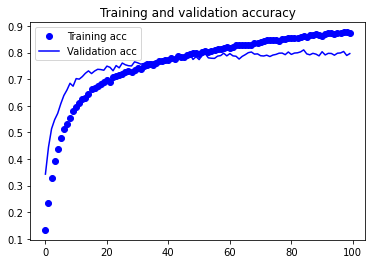

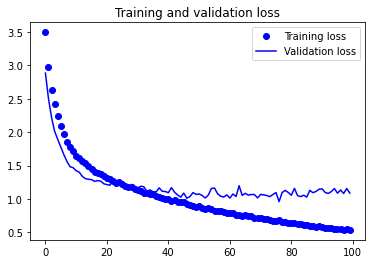

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=1e-3,l2=1e-3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
____________________________________

In [5]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])        
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_____________________________________

In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=7500/batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2000/batch_size,
        )

Train for 234.375 steps, validate for 62.5 steps
Epoch 1/100
235/234 [==============================] - 100s 426ms/step - loss: 29.4645 - acc: 0.1216 - val_loss: 27.6293 - val_acc: 0.3075
Epoch 2/100
235/234 [==============================] - 89s 378ms/step - loss: 26.0120 - acc: 0.1913 - val_loss: 24.3307 - val_acc: 0.3995
Epoch 3/100
235/234 [==============================] - 87s 369ms/step - loss: 22.8976 - acc: 0.2679 - val_loss: 21.3395 - val_acc: 0.4690
Epoch 4/100
235/234 [==============================] - 89s 377ms/step - loss: 20.1459 - acc: 0.3363 - val_loss: 18.7196 - val_acc: 0.5100
Epoch 5/100
235/234 [==============================] - 88s 376ms/step - loss: 17.7061 - acc: 0.3889 - val_loss: 16.3991 - val_acc: 0.5460
Epoch 6/100
235/234 [==============================] - 89s 379ms/step - loss: 15.5972 - acc: 0.4383 - val_loss: 14.4350 - val_acc: 0.5765
Epoch 7/100
235/234 [==============================] - 89s 380ms/step - loss: 13.7455 - acc: 0.4772 - val_loss: 12.6959 - 

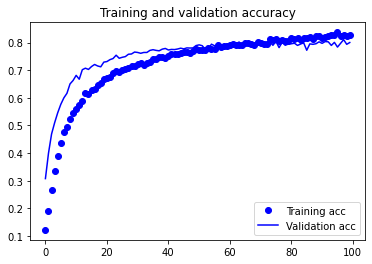

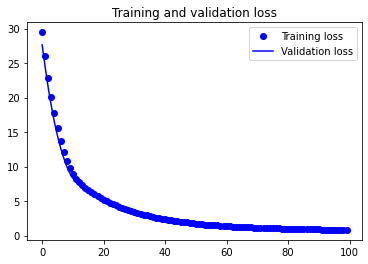

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Save the Model
#model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 500 images belonging to 10 classes.


In [9]:
# Model #1
model.load_weights('food_model_1.h5')
model.summary()
test_loss, test_accuracy = model.evaluate_generator(test_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [10]:
print("Test Loss of Model 1:", test_loss)
print("Test Accuracy of Model 1:", test_accuracy)

Test Loss of Model 1: 1.0095873586833477
Test Accuracy of Model 1: 0.71


In [9]:
# Model #2

model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=1e-3,l2=1e-3), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])        


model2.load_weights('food_model_2.h5')
model2.summary()
test_loss, test_accuracy = model2.evaluate_generator(test_generator)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
___________________________________

In [59]:
print("Test Loss of Model 2:", test_loss)
print("Test Accuracy of Model 2:", test_accuracy)

Test Loss of Model 2: 1.0768893770873547
Test Accuracy of Model 2: 0.802


In [60]:
# Save the best model
model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [10]:
# Load the model
model2.load_weights('food_model_best.h5')

In [11]:
# Load the food list (in alphabetical order)
with open('60.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['bibimbap', 'bread_pudding', 'ceviche', 'clam_chowder', 'creme_brulee', 'grilled_cheese_sandwich', 'pho', 'prime_rib', 'scallops', 'tacos']


In [12]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

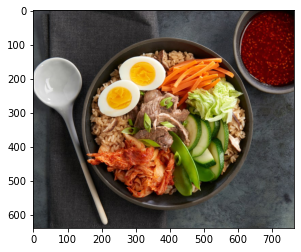

The prediction is:  bibimbap 

    bibimbap  bread_pudding   ceviche  clam_chowder  creme_brulee  \
0  0.811327       0.000097  0.001865      0.000012      0.000458   

   grilled_cheese_sandwich       pho  prime_rib  scallops     tacos  
0                 0.000289  0.148316    0.03142  0.000082  0.006135  


In [15]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'bibimbap.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

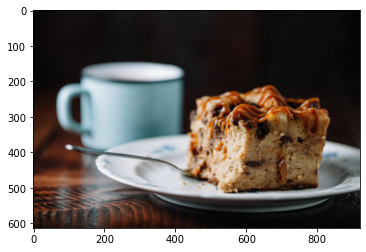

The prediction is:  bread_pudding 

    bibimbap  bread_pudding   ceviche  clam_chowder  creme_brulee  \
0  0.003016       0.946309  0.022847      0.000684      0.002981   

   grilled_cheese_sandwich       pho  prime_rib  scallops     tacos  
0                 0.010327  0.000426   0.007724  0.000779  0.004906  


In [21]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'bread_pudding.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

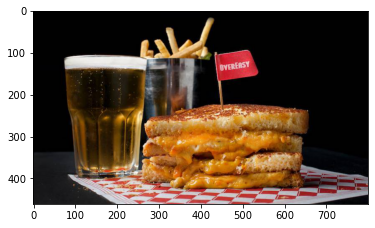

The prediction is:  grilled_cheese_sandwich 

    bibimbap  bread_pudding   ceviche  clam_chowder  creme_brulee  \
0  0.000576       0.011714  0.002489      0.000452      0.001386   

   grilled_cheese_sandwich       pho  prime_rib  scallops     tacos  
0                 0.924194  0.000871   0.050626  0.003316  0.004376  


In [18]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'sandwich.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)